In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [132]:
data = pd.read_csv('train.csv')

In [133]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
filtered_data = data.copy()


In [136]:
filtered_data['Age'].mean()


29.69911764705882

In [137]:
filtered_data.loc[filtered_data.Age.isnull(), 'Age'] = filtered_data['Age'].mean()

In [138]:
filtered_data.set_index('PassengerId', inplace=True)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [139]:
filtered_data['Cabin'] = filtered_data['Cabin'].apply(lambda x : x[0] if isinstance(x,str) else None )

In [140]:
dummies_data = pd.get_dummies(filtered_data, columns=['Sex', 'Cabin', 'Embarked'])

<AxesSubplot: >

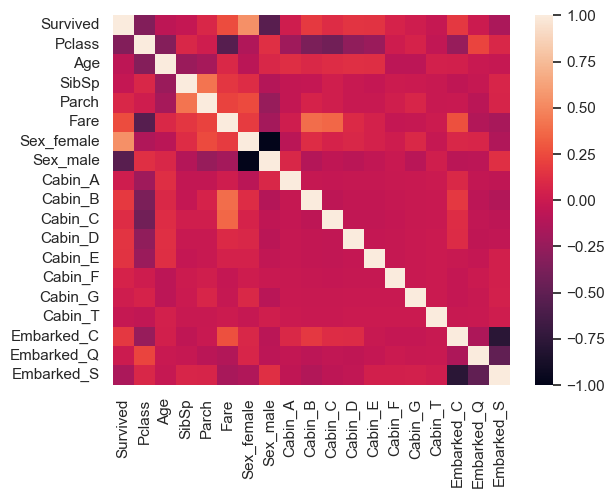

In [141]:
sns.heatmap(dummies_data.corr())

C:\Users\baigs\AppData\Local\Temp\ipykernel_15524\2135330297.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=filtered_data,x='Sex',y='Age', palette='dark')
c:\Users\baigs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\baigs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='Sex', ylabel='Age'>

c:\Users\baigs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\baigs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\baigs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


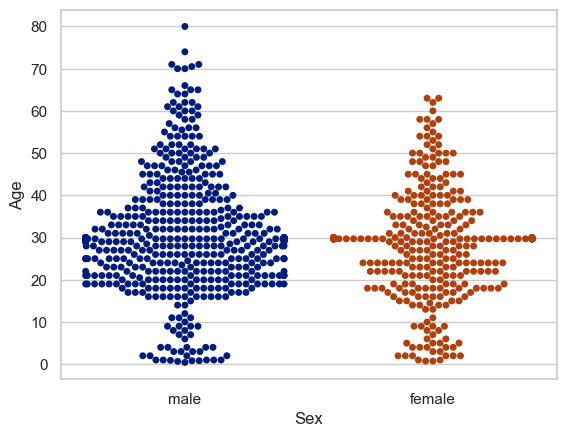

In [142]:
sns.swarmplot(data=filtered_data,x='Sex',y='Age', palette='dark')

In [143]:
age_bins = []
for i in range(0,110,10):
    age_bins.append(i)

filtered_data['AgeGroup'] = pd.cut(filtered_data['Age'], bins=age_bins, right=False)
age_groups_survival = filtered_data[['Survived','AgeGroup']].groupby('AgeGroup', as_index=False).sum()
age_groups_survival['Total'] = filtered_data[['Survived','AgeGroup']].groupby('AgeGroup', as_index=False).count()['Survived']

age_groups_survival

,AgeGroup,Survived,Total
0,"[0, 10)",38,62
1,"[10, 20)",41,102
2,"[20, 30)",129,397
3,"[30, 40)",73,167
4,"[40, 50)",34,89
5,"[50, 60)",20,48
6,"[60, 70)",6,19
7,"[70, 80)",0,6
8,"[80, 90)",1,1
9,"[90, 100)",0,0


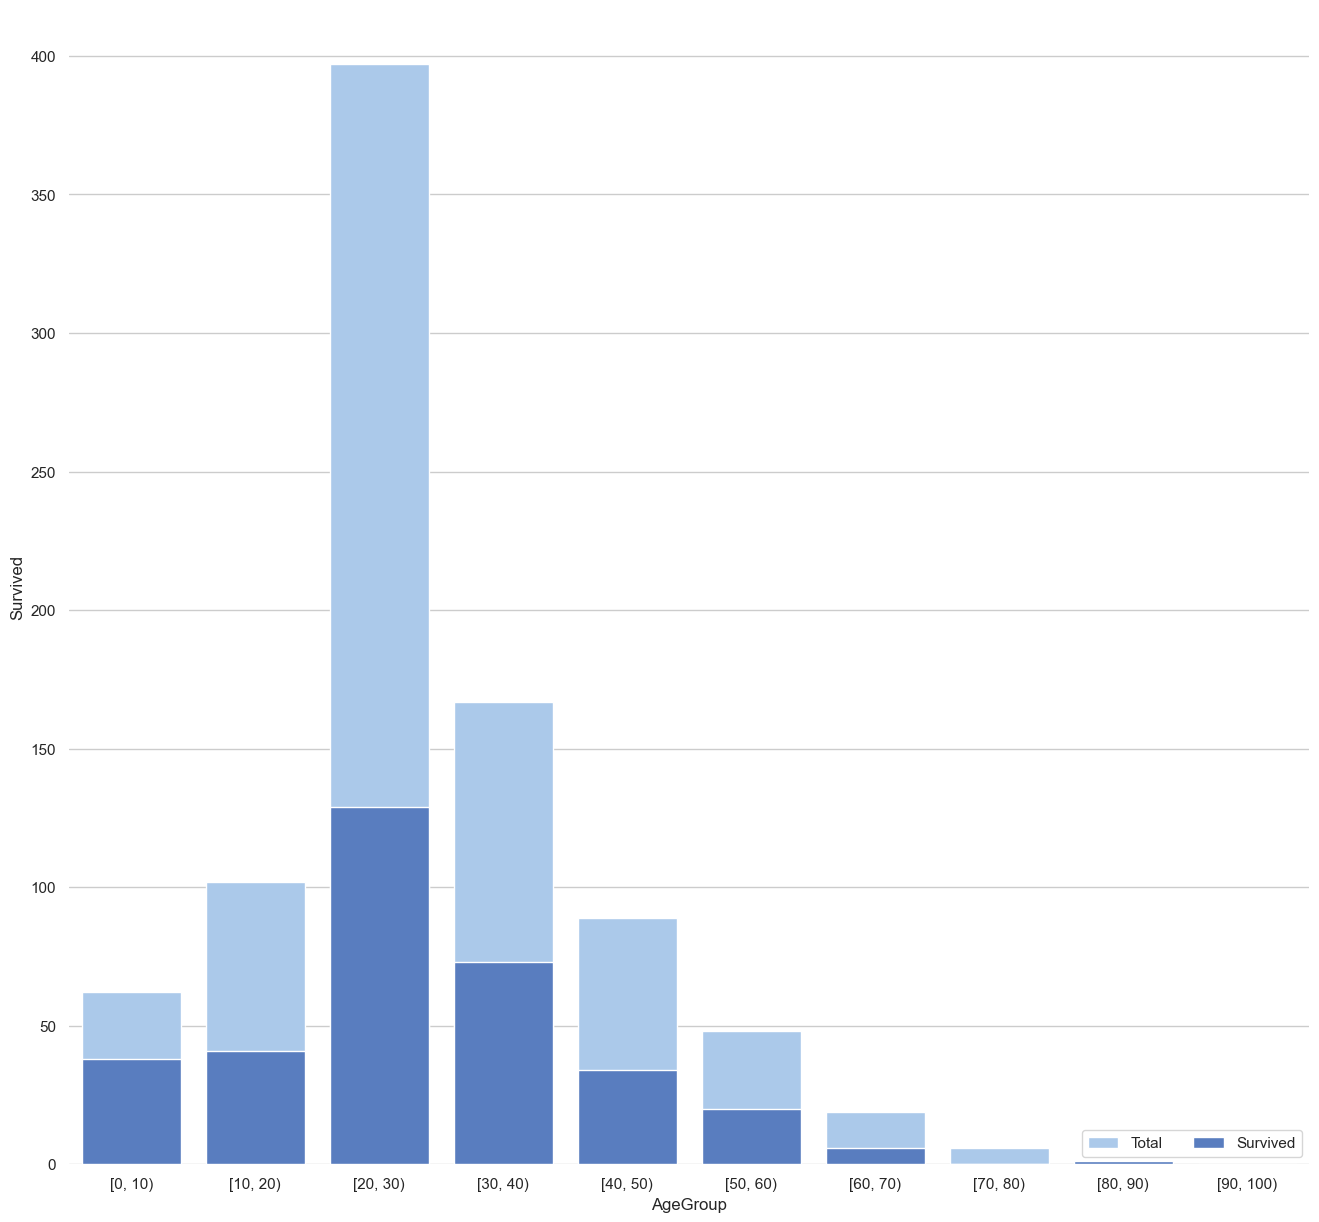

In [144]:
f, ax = plt.subplots(figsize=(16, 15))

sns.set_color_codes("pastel")
sns.barplot(x="AgeGroup", y="Total", data=age_groups_survival,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="AgeGroup", y="Survived", data=age_groups_survival,
            label="Survived", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

C:\Users\baigs\AppData\Local\Temp\ipykernel_15524\1523090646.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


[Text(0, 0.0, '0%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.4, '40%'),
 Text(0, 0.6000000000000001, '60%'),
 Text(0, 0.8, '80%'),
 Text(0, 1.0, '100%'),
 Text(0, 1.2000000000000002, '120%')]

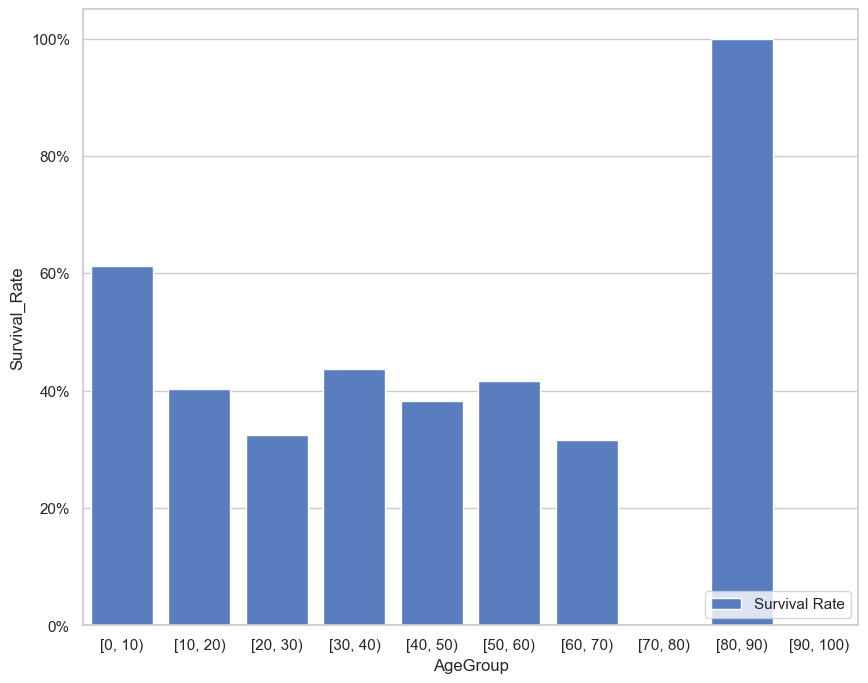

In [172]:
f, ax = plt.subplots(figsize=(10, 8))
age_groups_survival['Survival_Rate'] = age_groups_survival['Survived'] / age_groups_survival['Total']
sns.barplot(x="AgeGroup", y="Survival_Rate", data=age_groups_survival,
            label="Survival Rate", color="b")
            
ax.legend(ncol=2, loc="lower right", frameon=True)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

In [169]:
gender_survival = filtered_data[['Sex','Survived']].groupby('Sex', as_index=False).sum()
gender_survival['Total'] = filtered_data[['Sex','Survived']].groupby('Sex', as_index=False).count()['Survived']

gender_survival['Survival_Rate'] = gender_survival['Survived'] / gender_survival['Total'] 


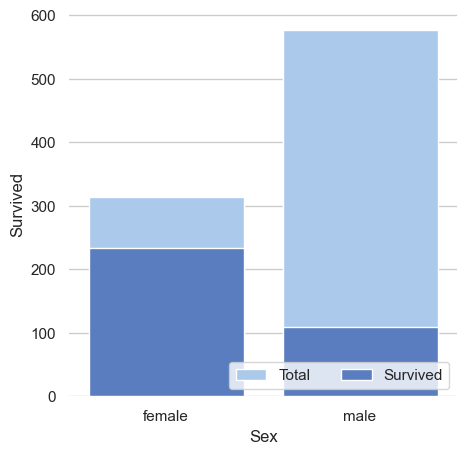

In [170]:
f, ax = plt.subplots(figsize=(5, 5))

sns.set_color_codes("pastel")
sns.barplot(x="Sex", y="Total", data=gender_survival,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="Sex", y="Survived", data=gender_survival,
            label="Survived", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

C:\Users\baigs\AppData\Local\Temp\ipykernel_15524\1830238149.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


[Text(0, 0.0, '0%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.30000000000000004, '30%'),
 Text(0, 0.4, '40%'),
 Text(0, 0.5, '50%'),
 Text(0, 0.6000000000000001, '60%'),
 Text(0, 0.7000000000000001, '70%'),
 Text(0, 0.8, '80%')]

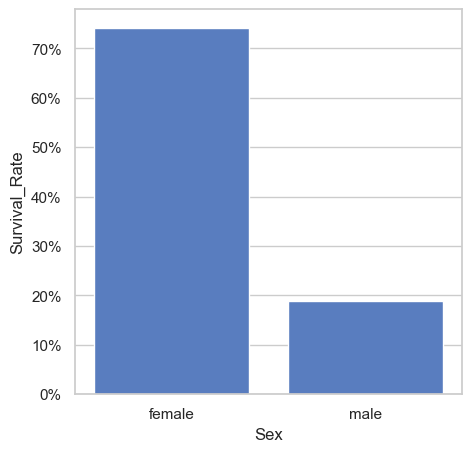

In [171]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x="Sex", y="Survival_Rate", data=gender_survival,
            label="Survival Rate", color="b")
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])